+Using the dataset "Income Classification" from Kaggle I am going to create a model that will predict income (as either <= 50k or > 50k) using a number of features.  This topic interests me because there are many conflicting ideas about what makes someone get a higher income.  Does a higher level of education lead to more money?  How big of a role does gender or race play?  These (and others) are questions that I hope I will be able to identify by examining this dataset. 

Link to dataset: https://www.kaggle.com/lodetomasi1995/income-classification

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')

In [105]:
income_df = pd.read_csv("income_evaluation.csv")

# Introductory Analysis of Dataset

In [106]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [107]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [108]:
# I am checking to see if there are any null values
income_df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

So far a couple of things stick out to me.  First, I notice that there are no null values!  Second, I notice there are a lot of objects that I will need to make into integers so that I can use them in my models.  The first thing I do will be to manipulate this DataFrame to make it more "model friendly."

As I was working through some of this I was getting Keytype errors even though I double-checked that I was typing column names in correctly.  What I realized is that some of the columns have spaces in front of them that were causing the errors.  I am going to eliminate all of those here to make the rest of my work easier.

In [109]:
print(income_df.columns.values)

['age' ' workclass' ' fnlwgt' ' education' ' education-num'
 ' marital-status' ' occupation' ' relationship' ' race' ' sex'
 ' capital-gain' ' capital-loss' ' hours-per-week' ' native-country'
 ' income']


In [110]:
# This will remove the space in front of the income column name
income_df.columns = income_df.columns.str.strip()

In [111]:
print(income_df.columns.values)

['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income']


In [112]:
income_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Target Variable: Income
My goal is to use a classification model to classify each person into one of two categories: <=50k or > 50k.  I am going to look more in-depth at my target variable and make some comparisons to the other features of it to get a better idea of what I am working with.  To use this variable with my model I need to make it an integer.  I have decided to create a column called '>50K' that will return a 1 if they make more than 50K and a 0 if they make less.

I will be using this section to explore the data in relation to the income variable.

In [113]:
# The first thing I need to do is make my target variable, income, into an integer.
# I am going to do this by turning it into a column that identifies whether someone
# makes less than 50k or more than 50k
# A 0 means they earn less than 50k and a 1 means they earn more

income_df['>50K'] = pd.get_dummies(income_df['income'], drop_first=True)
income_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


Text(0.5, 1.0, 'Number of people sorted by their income')

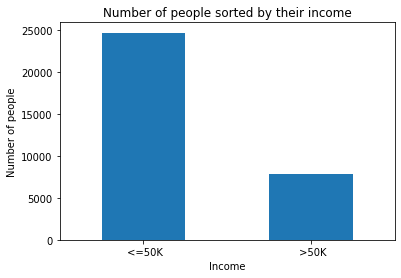

In [114]:
income_df['income'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.title('Number of people sorted by their income')

It is clear the majority of the people in my dataset fall into the <=50K category.  This makes sense (based on the United States, which as we will see later makes up the majority of this dataset, because the average salary is $47,060 (according to the Bureau of Labor Statistics, first quarter of 2019).

# Gender

I am going to start taking a closer look at the different features that I will be using in the models to make them ready to be used.  First, I am starting with the 'sex' column to get an idea of the number of people I'm working with and how best to make this into a numerical column.

In [115]:
# To help me examine the data by gender I am creating a new column that
# will tell me if the person is male or female and makes less than 50K or 
# more than 50K
def new_column(row):
  
  if row['sex'].strip() == 'Male' and row['income'].strip() == '<=50K':
    return "Male <=50K"
  elif row['sex'].strip() == 'Male' and row['income'].strip() == '>50K':
    return 'Male >50K'
  elif row['sex'].strip() == 'Female' and row['income'].strip() == '<=50K':
    return 'Female <=50K'
  else:
    return 'Female >50K'

income_df['Money_by_sex'] = income_df.apply(new_column, axis='columns')

In [116]:
income_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,>50K,Money_by_sex
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Male <=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Male <=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Male <=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Male <=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Female <=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,Female <=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0,Female <=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,Male >50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,Female >50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1,Male >50K


Text(0.5, 1.0, 'Income graphed by Gender')

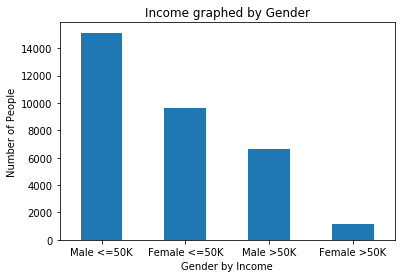

In [117]:
income_df['Money_by_sex'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender by Income')
plt.ylabel('Number of People')
plt.title('Income graphed by Gender')

In [118]:
# I am getting an idea of the distribution of males compared to females
# This shows that there are twice as many males as females sampled in this dataset
income_df['sex'].value_counts(normalize=True) * 100

 Male      66.920549
 Female    33.079451
Name: sex, dtype: float64

In [119]:
income_df['Money_by_sex'].value_counts(normalize=True) * 100

Male <=50K      46.460490
Female <=50K    29.458555
Male >50K       20.460060
Female >50K      3.620896
Name: Money_by_sex, dtype: float64

The above graph shows a clear distinction in the number of males and females in the data as well as big gap in the distribution of males and females based on the income that they receive.  The statistic underneath the graph shows the percentage of each value within the 'Money_by_sex' column and shows a pretty big discrepancy in the values.

In [120]:
# I am making a column that will change the 'sex' column to be
# a binary number (0 for a female and 1 for a male)
income_df['is_male'] = pd.get_dummies(income_df['sex'], drop_first=True)

In [121]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,>50K,Money_by_sex,is_male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Male <=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Male <=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Male <=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Male <=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Female <=50K,0


# Age and Income

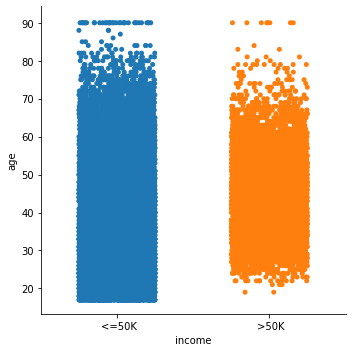

In [122]:
# I'm going to take a look at the age variable and see how this looks
# compared to my target variable of income
sns.catplot(x='income', y='age', data=income_df, jitter='.25')

In [123]:
stats.pearsonr(income_df['age'], income_df['>50K'])

(0.2340371026488599, 0.0)

This catplot and pearsonr correlation make it clear that age has a minor correlation with the income that someone makes.  I can see that in general there are more younger people in the less than 50K section of the graph but overall both income categories are pretty packed throughout the ages 30-60.  The pearsonr test shows me that the correlation is less than my threshold of .05 which means that this correlation is significant.

In [124]:
income_df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,>50K,is_male
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037,0.088832
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463,0.026858
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154,0.012280
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329,0.048480
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526,0.045567
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689,0.229309
>50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000,0.215980
is_male,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,0.215980,1.000000


In [125]:
income_df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
>50K                  2
Money_by_sex          4
is_male               2
dtype: int64

Looking at the current integers that I have and comparing them to the new '>50K' column nothing that currently exists has a very strong correlation.  I am going to make a few more of the columns into dummies to check their correlation. I am also going to drop the finlwgt column because it has a very minor correlation with my target variable.  I am also dropping my 'income' and 'fnlwgt' column.  The 'fnlwgt' has far too many different values and such a small correlation with my target variable that it will not be useful in this analysis.

In [126]:
income_df.drop(labels=['fnlwgt', 'income'], axis=1, inplace=True)

In [127]:
income_df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,>50K,is_male
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037,0.088832
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154,0.012280
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329,0.048480
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526,0.045567
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689,0.229309
>50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000,0.215980
is_male,0.088832,0.012280,0.048480,0.045567,0.229309,0.215980,1.000000


In [128]:
income_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K,Money_by_sex,is_male
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Male <=50K,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Male <=50K,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Male <=50K,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Male <=50K,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Female <=50K,0


# Native Country and Race

In [129]:
# I'm checking the value counts for the model and notice
# that the United States makes up most of the data
income_df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

I am limiting the dataset to only include the United States in the 'native-country' column due to the large number of values from that country compared to others.
It would be interesting to compare the U.S. to other countries but I would need more data for the comparisons to be significant.

In [130]:
# I am creating a variable that will take the countries listed
# and then it will take the first one in the list (which is the United States) 
# and make my dataframe include just the rows that have that country as a value
countries=income_df['native-country'].value_counts().index
income_df=income_df[income_df['native-country']==countries[0]]

In [131]:
# Here I dropped the native country column since I know that all of them left in the dataframe are
# from the United States
income_df.drop(columns='native-country', inplace=True)

From my earlier analysis I notice that there are 5 different races listed in the dataframe.  I am going to create binary columns for each of those races so that I can use this as a factor in my model.

In [132]:
income_df[['Amer-Indian-Eskimo', 'Asian-Pac-Islander','Black','Other','White']] = pd.get_dummies(income_df['race'])

In [133]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 32560
Data columns (total 20 columns):
age                   29170 non-null int64
workclass             29170 non-null object
education             29170 non-null object
education-num         29170 non-null int64
marital-status        29170 non-null object
occupation            29170 non-null object
relationship          29170 non-null object
race                  29170 non-null object
sex                   29170 non-null object
capital-gain          29170 non-null int64
capital-loss          29170 non-null int64
hours-per-week        29170 non-null int64
>50K                  29170 non-null uint8
Money_by_sex          29170 non-null object
is_male               29170 non-null uint8
Amer-Indian-Eskimo    29170 non-null uint8
Asian-Pac-Islander    29170 non-null uint8
Black                 29170 non-null uint8
Other                 29170 non-null uint8
White                 29170 non-null uint8
dtypes: int64(5), objec

In [134]:
income_df.nunique()

age                    73
workclass               9
education              16
education-num          16
marital-status          7
occupation             15
relationship            6
race                    5
sex                     2
capital-gain          119
capital-loss           89
hours-per-week         94
>50K                    2
Money_by_sex            4
is_male                 2
Amer-Indian-Eskimo      2
Asian-Pac-Islander      2
Black                   2
Other                   2
White                   2
dtype: int64

# Education Levels
The education column and the education-num column are related.  Education lists the highest level of education that a person has achieved and the education-num column is that same information in numerical form.

In [135]:
income_df['education'].nunique()

16

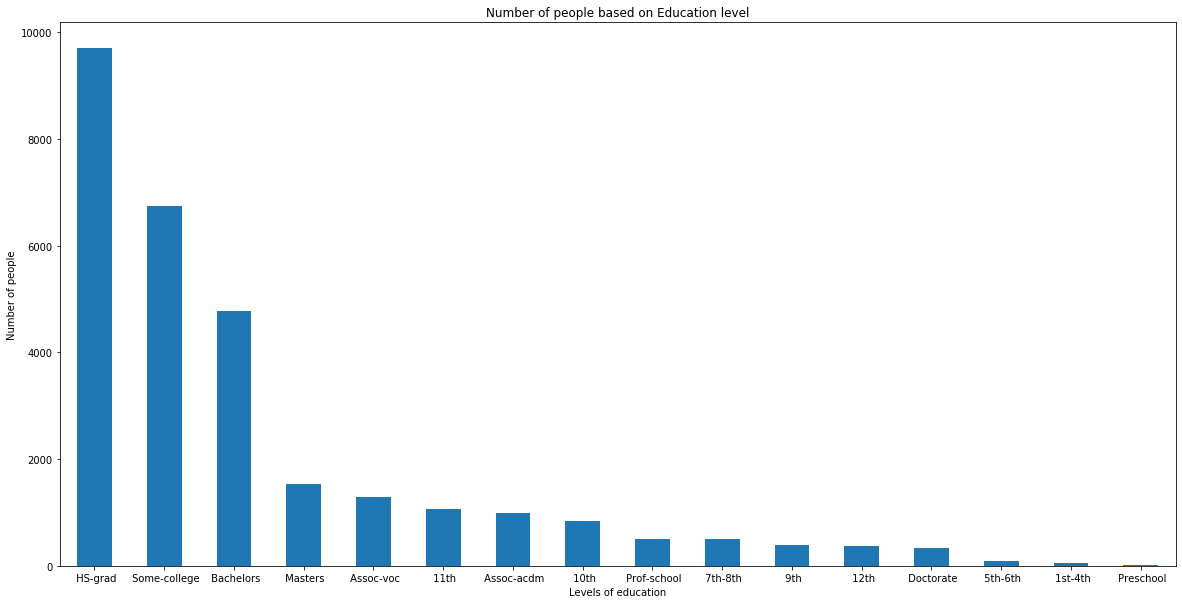

In [136]:
plt.figure(figsize=(20,10))
income_df['education'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Levels of education')
plt.ylabel('Number of people')
plt.title('Number of people based on Education level')
plt.show()

In [137]:
income_df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,>50K,Money_by_sex,is_male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,Male <=50K,1,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,Male <=50K,1,0,0,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,Male <=50K,1,0,0,0,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,Male <=50K,1,0,0,1,0,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0,Female <=50K,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,Female <=50K,0,0,0,0,0,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,Male >50K,1,0,0,0,0,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,Female <=50K,0,0,0,0,0,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,Male <=50K,1,0,0,0,0,1


It is clear that the overwhelming amount of people from this dataset are from the HS-grad, Some-college, and Bachelors level of education.  There is already a column that uses integers to show the level of education (education-num) in the dataset.  I am going to create my own 'Education_levels' column that will consolidate the 16 different values into 5.  I have decided to combine the HS-Grads, Professional School, and any grade level lower than that into one group (0) and then Some-college, Bachelors, Masters, and Doctorate into their own groups.  

In [138]:
def new_column(row):
  
  if row['education'].strip() == 'Some-college':
    return 1
  elif row['education'].strip() == 'Bachelors':
    return 2
  elif row['education'].strip() == 'Masters':
    return 3
  elif row['education'].strip() == 'Doctorate':
    return 4
  else:
    return 0
income_df['Education_levels'] = income_df.apply(new_column, axis='columns')

In [139]:
income_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,>50K,Money_by_sex,is_male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Education_levels
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,40,0,Male <=50K,1,0,0,0,0,1,2
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,13,0,Male <=50K,1,0,0,0,0,1,2
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,40,0,Male <=50K,1,0,0,0,0,1,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,40,0,Male <=50K,1,0,0,1,0,0,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,40,0,Female <=50K,0,0,0,0,0,1,3


# Work Class

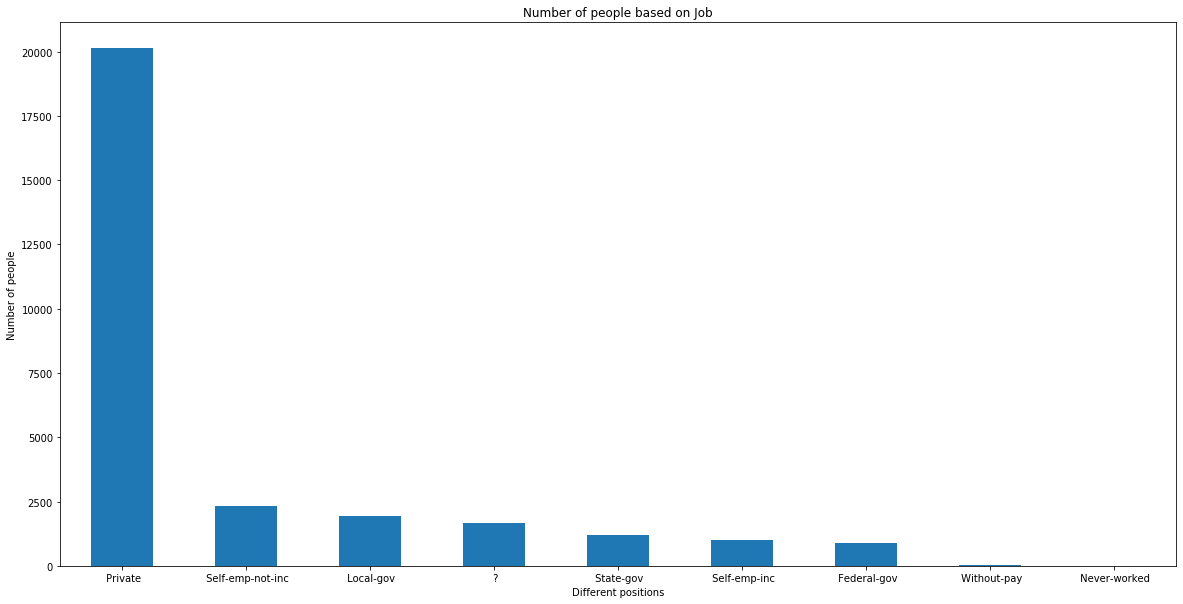

In [140]:
plt.figure(figsize=(20,10))
income_df['workclass'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Different positions')
plt.ylabel('Number of people')
plt.title('Number of people based on Job')
plt.show()

Based on this chart it is clear that the majority of the workclass is private.  I am going to run create dummies and then run a correlation function to see what the correlation between this and my target variable is.

In [141]:
income_df[['Private','Self-emp-not-inc','Local-gov','?','State-gov Different positions','Self-emp-inc', 'Federal-gov','Without-pay','Never-worked']] = pd.get_dummies(income_df['workclass'])

In [142]:
income_df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,>50K,is_male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,...,Education_levels,Private,Self-emp-not-inc,Local-gov,?,State-gov Different positions,Self-emp-inc,Federal-gov,Without-pay,Never-worked
age,1.000000,0.033089,0.077409,0.057485,0.071453,0.234725,0.096393,-0.009499,-0.011857,-0.018174,...,0.056001,0.046279,0.050603,0.062393,-0.020418,-0.202111,0.102990,0.139084,0.011409,0.011775
education-num,0.033089,1.000000,0.127686,0.079305,0.161978,0.335994,0.013395,-0.034444,0.020205,-0.096061,...,0.746284,-0.088391,0.053788,0.099097,-0.017731,-0.105843,0.078151,0.010598,0.094541,-0.009633
capital-gain,0.077409,0.127686,1.000000,-0.032194,0.078478,0.222601,0.050105,-0.006625,-0.003882,-0.021674,...,0.077535,-0.017093,-0.009148,-0.008614,-0.002286,-0.035708,0.099539,0.030964,-0.010710,-0.001613
capital-loss,0.057485,0.079305,-0.032194,1.000000,0.051498,0.149118,0.044675,-0.013128,-0.011450,-0.024733,...,0.069837,-0.017458,0.008455,0.014211,-0.003380,-0.022180,0.027737,0.018940,-0.003506,-0.004607
hours-per-week,0.071453,0.161978,0.078478,0.051498,1.000000,0.232551,0.233945,-0.002494,-0.013056,-0.056127,...,0.104484,-0.170550,0.012424,0.014242,-0.014997,-0.019009,0.123798,0.092681,-0.022178,-0.010441
>50K,0.234725,0.335994,0.222601,0.149118,0.232551,1.000000,0.221179,-0.030003,-0.003026,-0.092829,...,0.282636,-0.079700,0.054833,0.029969,-0.008845,-0.070405,0.138165,0.026633,0.011396,-0.012056
is_male,0.096393,0.013395,0.050105,0.044675,0.233945,0.221179,1.000000,-0.011443,-0.013222,-0.120241,...,0.008547,-0.062034,0.000881,-0.038063,0.001520,-0.038238,0.088782,0.110663,-0.022775,-0.002363
Amer-Indian-Eskimo,-0.009499,-0.034444,-0.006625,-0.013128,-0.002494,-0.030003,-0.011443,1.000000,-0.010181,-0.033201,...,-0.028624,0.012060,0.019951,0.022089,-0.001569,-0.021689,-0.015211,0.000670,0.004669,-0.002138
Asian-Pac-Islander,-0.011857,0.020205,-0.003882,-0.011450,-0.013056,-0.003026,-0.013222,-0.010181,1.000000,-0.032973,...,0.010948,0.003558,0.024343,-0.004929,-0.001558,-0.007118,-0.003650,-0.009118,0.013622,-0.002123
Black,-0.018174,-0.096061,-0.021674,-0.024733,-0.056127,-0.092829,-0.120241,-0.033201,-0.032973,1.000000,...,-0.076991,0.019965,0.053964,0.036155,0.009870,-0.002211,-0.048711,-0.061948,0.017726,-0.001438


Based on the above correlations being so low in all the dummy columns for 'workclass' I am going to drop that feature.  It would likely create more noise for my models.

In [143]:
income_df.drop(columns=['Private','Self-emp-not-inc','Local-gov','?','State-gov Different positions','Self-emp-inc', 'Federal-gov','Without-pay','Never-worked'], inplace=True)

# Creating the Model: Logistic Regression
I am going to start out using a Logistic Regression model to predict the '>50K' column.

In [144]:
# I am dropping the columns that I won't be using for my model
income_df.drop(columns=['workclass','education','education-num','marital-status','occupation','relationship',
                        'race','sex','Money_by_sex'], inplace=True)

In [145]:
income_df.head()

,age,capital-gain,capital-loss,hours-per-week,>50K,is_male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Education_levels
0,39,2174,0,40,0,1,0,0,0,0,1,2
1,50,0,0,13,0,1,0,0,0,0,1,2
2,38,0,0,40,0,1,0,0,0,0,1,0
3,53,0,0,40,0,1,0,0,1,0,0,0
5,37,0,0,40,0,0,0,0,0,0,1,3


In [146]:
# Here I am splitting my data into a training and test set.  I have chosen to use 25% of the 
# sample size for the test set
y = income_df['>50K']
X = income_df.drop(columns='>50K')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

In [147]:
# I'm going to create the model here
import time
start_time = time.time()
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("--- %s seconds ---" % (time.time() - start_time))
print("The accuracy of Logistic Regression without regularization: {:.3f}".format(lr_score))

--- 0.15503454208374023 seconds ---
The accuracy of Logistic Regression without regularization: 0.815


In [148]:
# I created a confusion matrix so I can get a better idea of the amount of the accuracy of my model
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('The amount of True Negatives is {}'.format(TN))
print('The amount of False Negatives is {}'.format(FN))
print('The amount of True Positives is {}'.format(TP))
print('The amount of False Positives is {}'.format(FP))

# Printing out the total accuracy of the model
acc_lr = (TN + TP) / (TP + TN + FN + FP)
print('The total accuracy of the Logistic Regression Model is {}'.format(acc_lr))

The amount of True Negatives is 5246
The amount of False Negatives is 1033
The amount of True Positives is 698
The amount of False Positives is 316
The total accuracy of the Logistic Regression Model is 0.8150281091457562


In [149]:
income_df.head(10)

,age,capital-gain,capital-loss,hours-per-week,>50K,is_male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Education_levels
0,39,2174,0,40,0,1,0,0,0,0,1,2
1,50,0,0,13,0,1,0,0,0,0,1,2
2,38,0,0,40,0,1,0,0,0,0,1,0
3,53,0,0,40,0,1,0,0,1,0,0,0
5,37,0,0,40,0,0,0,0,0,0,1,3
7,52,0,0,45,1,1,0,0,0,0,1,0
8,31,14084,0,50,1,0,0,0,0,0,1,3
9,42,5178,0,40,1,1,0,0,0,0,1,2
10,37,0,0,80,1,1,0,0,1,0,0,1
12,23,0,0,30,0,0,0,0,0,0,1,2


# Creating the Model: Decision Tree and Random Forest
I am going to use a Random Forest Model with my data to compare to the Logistic Regression Model. 

In [150]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


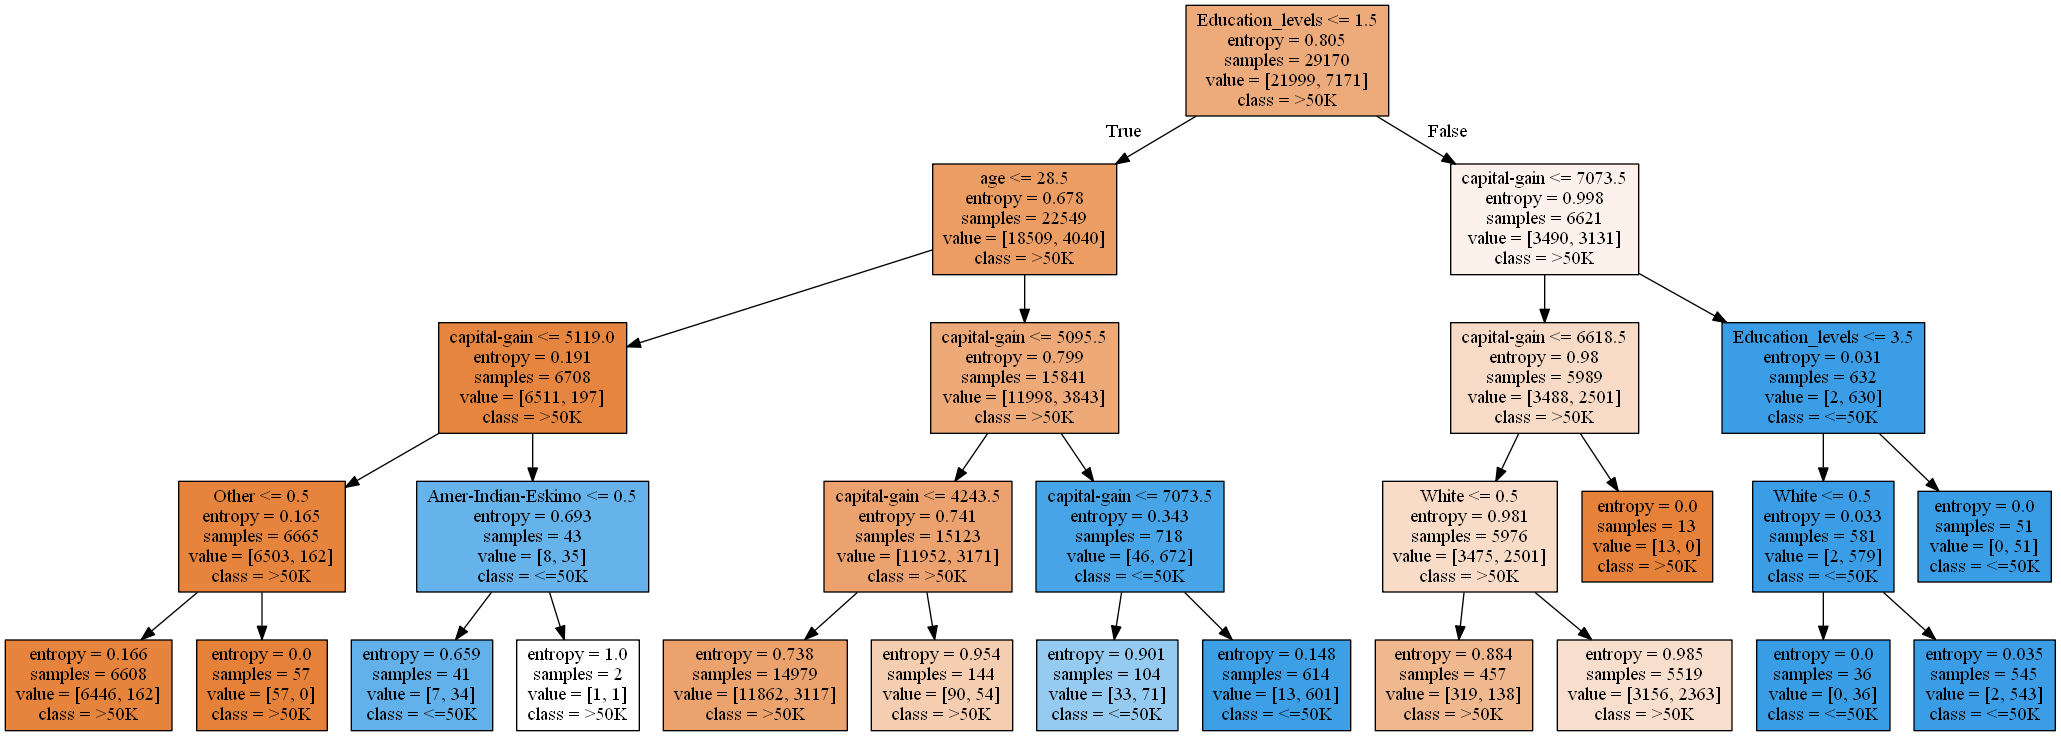

<Figure size 3600x2160 with 0 Axes>

In [163]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import time
start_time = time.time()

# I am making my X and Y here
Y = income_df['>50K']
X = income_df.drop('>50K', axis=1)

# I am creating and training the tree here
plt.figure(figsize=(50,30))
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 4,
)
decision_tree.fit(X,Y)

# I will use the below code to render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X.columns,
    class_names = ['>50K', '<=50K'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
# This slide needs to zoom out to fit the entire output

In [152]:
predictions=decision_tree.predict(X)
tp=0
fp=0
tn=0
fn=0
Y2=Y.reset_index()
l=len(predictions)
i=0
while i<l:
  if predictions[i]==1:
    if Y2['>50K'][i]==1:
      tp=tp+1
    else:
      fn=fn+1
  if predictions[i]==0:
    if Y2['>50K'][i]==0: 
      tn=tn+1
    else:
      fp=fp+1
  i=i+1
print('The number of True Positives is {}'.format(tp))
print('The number of False Positives is {}'.format(fp))
print('The number of True Negatives is {}'.format(tn))
print('The number of False Negatives is {}'.format(fn))

The number of True Positives is 2054
The number of False Positives is 5117
The number of True Negatives is 21652
The number of False Negatives is 347


In [153]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()
rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))



[0.81357094 0.80973603 0.82516284 0.81830648 0.81830648 0.82242029
 0.80630785 0.82756256 0.82002057 0.82304527]
--- 1.3099329471588135 seconds ---


The Random Forest model that I ran returned a very similar accuracy score to my Logistic Regression model.  The Random Forest model takes longer to run (about 5 times as long) as the Logistic Regression model.  This isn't a huge deal with this dataset but if I was working with a much larger dataset then this time difference would probably not be worth the 1% accuracy bump from the Random Forest.  

# Hyperparameter Tuning for Logistic Regression Model

In [154]:
# I am going to try dropping the Capital Gains and Loss columns
# to see what effect that has on my overall outcome
y = income_df['>50K']
X = income_df.drop(columns=['>50K'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

In [155]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("--- %s seconds ---" % (time.time() - start_time))
print("The accuracy of Logistic Regression without regularization: {:.3f}".format(lr_score))

--- 1.7874059677124023 seconds ---
The accuracy of Logistic Regression without regularization: 0.819


In [156]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000,C=.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("--- %s seconds ---" % (time.time() - start_time))
print("The accuracy of Logistic Regression without regularization: {:.3f}".format(lr_score))

--- 1.986449956893921 seconds ---
The accuracy of Logistic Regression without regularization: 0.813


In [157]:
lr = LogisticRegression(solver='saga', penalty='l2', max_iter=1000,C=.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("--- %s seconds ---" % (time.time() - start_time))
print("The accuracy of Logistic Regression without regularization: {:.3f}".format(lr_score))

--- 5.17825174331665 seconds ---
The accuracy of Logistic Regression without regularization: 0.792


In [158]:
lr = LogisticRegression(solver='saga', penalty='elasticnet', max_iter= 10000,C=.001, l1_ratio=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print("--- %s seconds ---" % (time.time() - start_time))
print("The accuracy of Logistic Regression without regularization: {:.3f}".format(lr_score))

--- 9.751274347305298 seconds ---
The accuracy of Logistic Regression without regularization: 0.793


# Hyperparameter Tuning for Random Forest Model

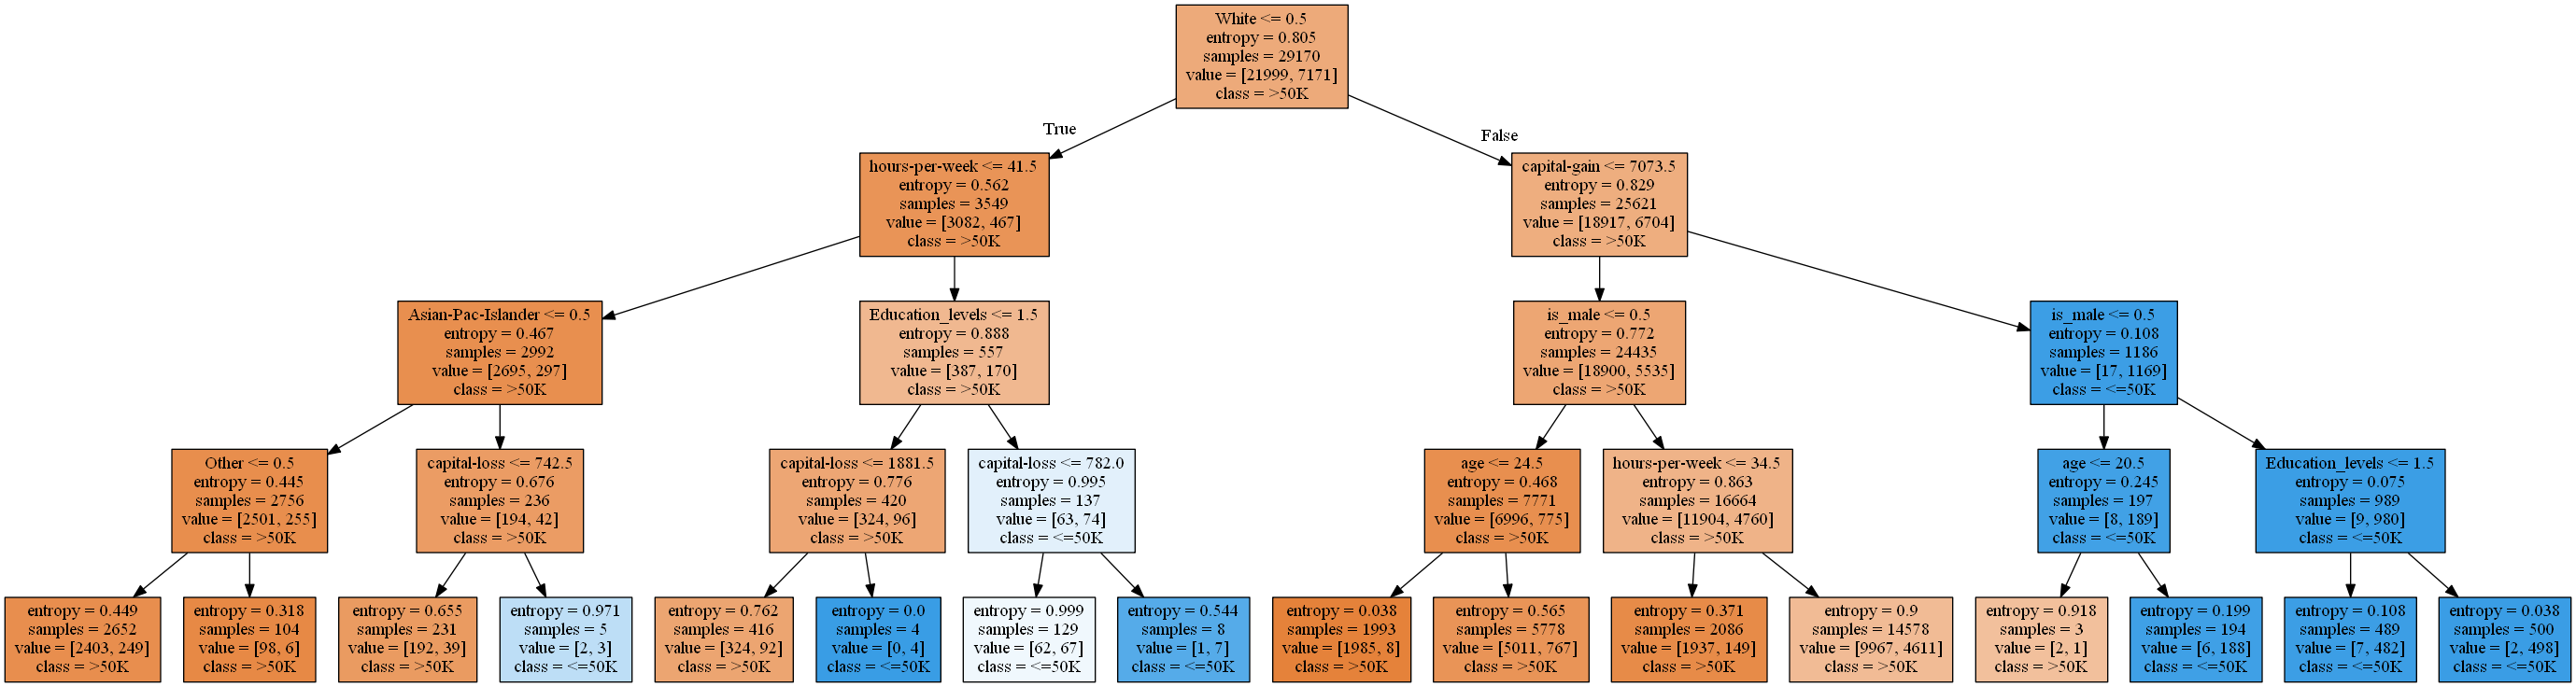

In [164]:
# Max Depth 4

# I'm going to use the Random Forest here
Y = income_df['>50K']
X = income_df.drop(['>50K'], axis=1)

# I am creating and training the tree here
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 4,
)
decision_tree.fit(X,Y)

# I will use the below code to render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X.columns,
    class_names = ['>50K', '<=50K'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [160]:
rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))


[0.81699794 0.82104902 0.81899212 0.80905039 0.81933493 0.82756256
 0.80973603 0.83030511 0.82379157 0.8175583 ]
--- 11.545419692993164 seconds ---


In [161]:
# Max Depth 6

# I'm going to use the Random Forest here
Y = income_df['>50K']
X = income_df.drop(['>50K'], axis=1)

# I am creating and training the tree here
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 6,
)
decision_tree.fit(X,Y)

# I will use the below code to render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X.columns,
    class_names = ['>50K', '<=50K'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[0.81322824 0.82104902 0.81590675 0.81967775 0.81967775 0.82104902
 0.80425094 0.82276311 0.82653411 0.81824417]
--- 13.677898168563843 seconds ---


In [166]:
# Max features 2 and Max Depth 6

# I'm going to use the Random Forest here
Y = income_df['>50K']
X = income_df.drop(['>50K'], axis=1)

# I am creating and training the tree here
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 2,
    max_depth = 6,
)
decision_tree.fit(X,Y)

# I will use the below code to render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X.columns,
    class_names = ['>50K', '<=50K'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[0.81391364 0.81796366 0.81727803 0.81899212 0.82276311 0.8244772
 0.81316421 0.83167638 0.81693521 0.82510288]
--- 1622.2697269916534 seconds ---


In [167]:
# Max features 2 and Max Depth 6

# I'm going to use the Random Forest here
Y = income_df['>50K']
X = income_df.drop(['>50K'], axis=1)

# I am creating and training the tree here
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'gini',
    max_features = 2,
    max_depth = 6,
)
decision_tree.fit(X,Y)

# I will use the below code to render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X.columns,
    class_names = ['>50K', '<=50K'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[0.82111035 0.81693521 0.81933493 0.8186493  0.82002057 0.82516284
 0.80425094 0.8320192  0.81419266 0.81721536]
--- 1640.1967692375183 seconds ---


# Conclusion
Using two different models, Logistic Regression and Random Forest, I was able to get right around an 82% accuracy for predicting income levels above or below 50K.

I started off choosing the simple (but effective) Logistic Regression and then thought that maybe a Random Forest Model might do a better job predicting my target variable.  It did slightly better overall, however, it took nearly 5 times as long to finish predicting.  This wasn't a huge deal with my current dataset but it would not be worth the time when we are talking about potentially taking hours to run.  

The "real-world" use for this model would be workers' advocate groups.  If groups can look at this model and get an idea of how much money people of similar education, race,gender, etc. are paid they can make sure that employers are not discriminating based on any of those factors.  

A shortcoming that I can see with this model and dataset are that it classifies into 2 pretty broad groups (less than 50K and greater than 50K).  If the specific incomes for each of the people in this dataset were given it would really be much more effective when being used in the "real-world" example that I mentioned above.  As it stands it is tough to identify any big discrepencies when you are only dealing with these broad groups.  Also, the data is clearly focused on the majority of "private" workers in the United States.  This likely skews the data because a very small number of samples from other countries and other fields of work (it doesn't really specify what private is exactly) are represented.  My model was limited to the United States because of this.

